<a href="https://colab.research.google.com/github/Anki4512/Class-Work/blob/main/Instagram_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn


In [2]:
# 1. Create a simulation of 1,000 users
n_samples = 1000

# 2. Create the "Features" (The Clues)
# How many minutes the user has been on the app today
minutes_on_app = np.random.randint(1, 120, n_samples)
# How many likes the post already has
post_popularity = np.random.randint(0, 10000, n_samples)
# Is the post a video? (0 = No, 1 = Yes)
is_video = np.random.randint(0, 2, n_samples)

# 3. Create the "Target" (The Answer)
# Did the user click? (0 = No, 1 = Yes)
clicked = np.random.randint(0, 2, n_samples)

# 4. Combine into a DataFrame (Table)
df = pd.DataFrame({
    'Minutes_On_App': minutes_on_app,
    'Post_Popularity': post_popularity,
    'Is_Video': is_video,
    'Clicked': clicked
})

# Show the first 5 rows
print(df.head())


   Minutes_On_App  Post_Popularity  Is_Video  Clicked
0               7             2859         0        1
1              64              573         0        1
2              69             1638         1        1
3              58             7466         0        0
4              58             8312         1        1


In [3]:
# Separate the Clues (X) from the Answer (y)
X = df[['Minutes_On_App', 'Post_Popularity', 'Is_Video']]
y = df['Clicked']

# Check the shapes (rows, columns)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 3)
y shape: (1000,)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 3)
X_test shape: (200, 3)
y_train shape: (800,)
y_test shape: (200,)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create the Model
# n_estimators=100 means "Create 100 different decision trees"
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Model (The Study Session)
# This is where it looks at X_train and learns to predict y_train
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [6]:
from sklearn.metrics import accuracy_score

# 1. Ask the model to predict the "Test" users
y_pred = model.predict(X_test)

# 2. Compare the predictions (y_pred) to the actual answers (y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.43


In [7]:
import time

print("--- 🔴 STARTING LIVE FEED SIMULATION 🔴 ---")
print("Processing users in real-time...\n")

# Simulate a stream of 10 new users
for i in range(1, 11):
    # 1. Generate a random new user on the fly
    new_user = pd.DataFrame({
        'Minutes_On_App': [np.random.randint(1, 120)],
        'Post_Popularity': [np.random.randint(0, 10000)],
        'Is_Video': [np.random.randint(0, 2)]
    })

    # 2. Ask the model for a prediction (0 or 1)
    prediction = model.predict(new_user)[0]

    # 3. Make a decision
    action = "SHOW VIDEO 🎬" if prediction == 1 else "Skip Post ❌"

    # Print the result live
    print(f"User {i}: {action}")

    # Wait 1 second to simulate real-time lag
    time.sleep(1)

print("\n--- 🏁 STREAM COMPLETE 🏁 ---")


--- 🔴 STARTING LIVE FEED SIMULATION 🔴 ---
Processing users in real-time...

User 1: SHOW VIDEO 🎬
User 2: SHOW VIDEO 🎬
User 3: Skip Post ❌
User 4: Skip Post ❌
User 5: SHOW VIDEO 🎬
User 6: SHOW VIDEO 🎬
User 7: SHOW VIDEO 🎬
User 8: SHOW VIDEO 🎬
User 9: Skip Post ❌
User 10: Skip Post ❌

--- 🏁 STREAM COMPLETE 🏁 ---


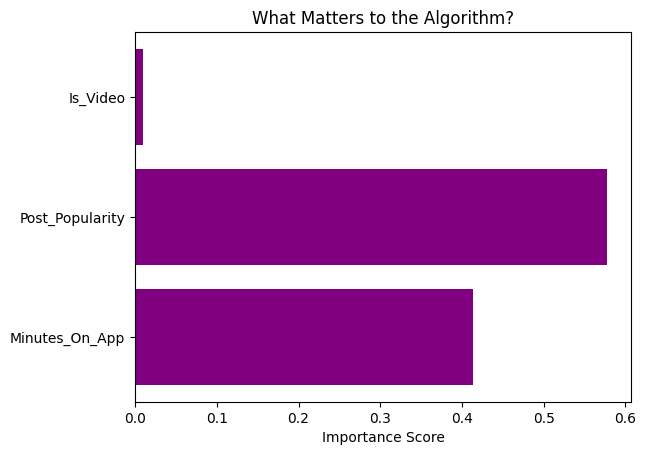

In [8]:
import matplotlib.pyplot as plt

# Get the importance of each clue
importances = model.feature_importances_
feature_names = ['Minutes_On_App', 'Post_Popularity', 'Is_Video']

# Create a simple bar chart
plt.barh(feature_names, importances, color='purple')
plt.title("What Matters to the Algorithm?")
plt.xlabel("Importance Score")
plt.show()
